# hftbacktest


## 下载数据

- https://github.com/nkaz001/hftbacktest/tree/6bcae676da517bec6486ddc0d0a7cfe702888679/examples/mexc/btcusdt_20250126.gz
- 
```
wget --recursive --no-parent --level=1 \
     https://raw.githubusercontent.com/nkaz001/hftbacktest/tree/examples/mexc/ -o tmp/mexc/
```


## 运行脚本

In [22]:
import os

import numpy as np
from hftbacktest import BacktestAsset, HashMapMarketDepthBacktest
from hftbacktest.data.utils import mexc
from numba import njit


@njit
def market_making_algo(hbt):
    count = 1
    while hbt.elapse(2.5e8) == 0 and count < 10:
        depth = hbt.depth(0)

        # Prints the best bid and the best offer.
        print(
            'current_timestamp:', hbt.current_timestamp,
            ', best_bid:', np.round(depth.best_bid, 1),
            ', best_ask:', np.round(depth.best_ask, 1)
        )
        count += 1

    return True


if __name__ == '__main__':
    current = os.getcwd()
    print(f"Current: {current}")

    data = mexc.convert(
        input_filename="../tmp/mexc/btcusdt_20250126.gz",
    )

    asset = (
        BacktestAsset()
        .data(data)
        .linear_asset(1.0)
        .power_prob_queue_model(2.0)
        .no_partial_fill_exchange()
        .trading_value_fee_model(-0.00005, 0.0007)
        .tick_size(0.1)
        .lot_size(0.001)
    )

    hbt = HashMapMarketDepthBacktest([asset])
    ret = market_making_algo(hbt)
    print(ret)



Current: /Users/dev/Documents/iSpace/better-py/learn-py/packages/py-quant/try-hftbacktest/src
Correcting the latency
Correcting the event order
current_timestamp: 1737892323570999936 , best_bid: 104698.7 , best_ask: 104706.0
current_timestamp: 1737892323820999936 , best_bid: 104702.3 , best_ask: 104702.4
current_timestamp: 1737892324070999936 , best_bid: 104702.3 , best_ask: 104702.4
current_timestamp: 1737892324320999936 , best_bid: 104702.3 , best_ask: 104702.4
current_timestamp: 1737892324570999936 , best_bid: 104702.3 , best_ask: 104702.4
current_timestamp: 1737892324820999936 , best_bid: 104702.3 , best_ask: 104702.4
current_timestamp: 1737892325070999936 , best_bid: 104702.3 , best_ask: 104702.4
current_timestamp: 1737892325320999936 , best_bid: 104702.3 , best_ask: 104702.4
current_timestamp: 1737892325570999936 , best_bid: 104702.3 , best_ask: 104702.4
True


           ev              exch_ts             local_ts         px       qty  \
0  3489660929  1737892323320999936  1737892323412485120  104906.19  0.000000   
1  2684354561  1737892323321999872  1737892323412538112  104491.60  0.884644   
2  3489660929  1737892323323000064  1737892323412486912  104953.54  0.000000   
3  3489660929  1737892323323000064  1737892323412506880  104915.34  0.958457   
4  3758096385  1737892323323000064  1737892323412520960  104484.78  0.000000   

   order_id  ival  fval  
0         0     0   0.0  
1         0     0   0.0  
2         0     0   0.0  
3         0     0   0.0  
4         0     0   0.0  


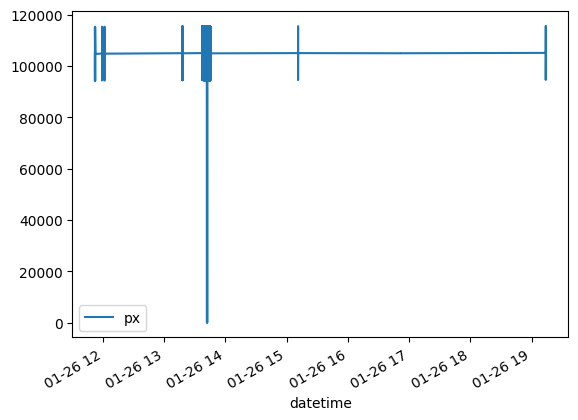

In [25]:
# 根据这个数据, 绘制图像

import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame(data)

# 打印数据结构
print(df.head())

df['datetime'] = pd.to_datetime(df['exch_ts'], unit="ns")
df.set_index('datetime', inplace=True)

fig, ax = plt.subplots()
df[['px', ]].plot(ax=ax)
plt.show()
